In [1]:
import matplotlib.pylab as plt
import numpy as np 
import arby
from scipy.integrate import odeint

In [2]:
def pend(y, t, b, λ):
    θ, ω = y
    dydt = [ω, -b*ω - λ*np.sin(θ)]

    return dydt

In [3]:
# set friction strength
b = 0.2
# set initial conditions
y0 = [np.pi/2, 0.]

In [4]:
# set a time discretization
times = np.linspace(0,50,1001)

In [5]:
# plot a simple solution
λ = 1.
sol = odeint(pend,y0, times, (b,λ))

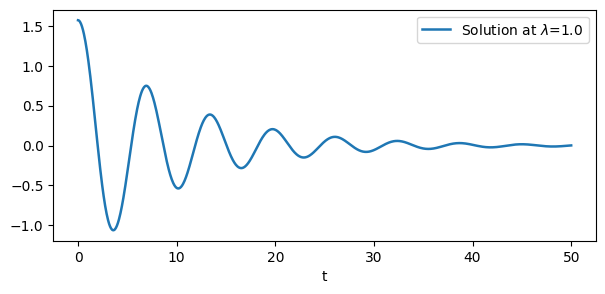

In [6]:
plt.figure(figsize=(7,3))
plt.plot(times, sol[:,0], label=f'Solution at $\lambda$={λ}', lw=1.8)
plt.xlabel('t')
plt.legend()

In [7]:
from arby import ReducedOrderModel as ROM


In [8]:
param = np.linspace(1,5,101)

In [9]:
training = []
for λ in param:
    sol = odeint(pend,y0, times, (b,λ))
    training.append(sol[:,0])

In [10]:
pendulum = ROM(training, times, param, greedy_tol=1e-10, poly_deg=5)

In [11]:
pendulum.surrogate(1.14)

array([ 1.57079633,  1.56937605,  1.56513411, ..., -0.00282272,
       -0.00331635, -0.00379569])

In [12]:
surr = pendulum.surrogate

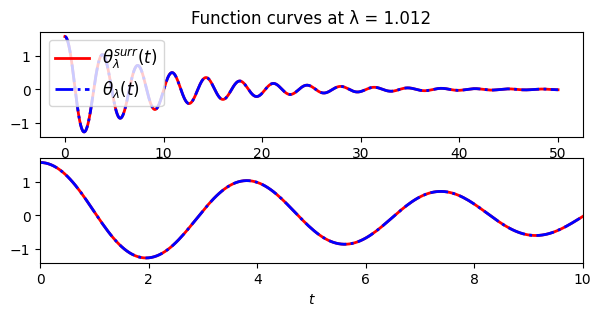

In [13]:
par = 3.42
sol = odeint(pend,y0, times, (b,par))[:,0]
fig, ax = plt.subplots(2,1, figsize=(7,3))
ax[0].plot(times, surr(par), 'r', lw=2, label='$θ_λ^{surr}(t)$')
ax[0].plot(times, sol, 'b-.', lw=2, label='$θ_λ(t)$')
ax[1].plot(times, surr(par), 'r', lw=2, label='$θ_λ^{surr}(t)$')
ax[1].plot(times, sol, 'b-.', lw=2, label='$θ_λ(t)$')
ax[1].set(xlim=(0,10))
ax[1].set(xlabel='$t$')
ax[0].set_title('Function curves at λ = 1.012')
ax[0].legend(fontsize = 'large')

In [14]:
pendulum.basis_.eim_.nodes[:5]

[0, 70, 95, 144, 232]

In [15]:
np.shape(pendulum.basis_.eim_.interpolant)

(1001, 41)

In [16]:
pwd

'/home/agustin/facultad/scikit_rm/scikit-reducedmodel'

In [17]:
from skreducedmodel.reducedbasis import ReducedBasis

In [18]:
model = ReducedBasis(
                     index_seed_global_rb = 0,
                     greedy_tol = 1e-10,
                     lmax = 0, 
                     normalize = False
                     )

In [19]:
rb = model.fit(
               training_set = np.array(training), 
               parameters = param, 
               physical_points = times,
               )

0 5.963382996863227 77
1 5.591609670858395 31
2 4.25351960892006 100
3 3.976519613004471 52
4 3.8667681341741025 14
5 1.3801359489387652 64
6 1.250457886707946 7
7 1.2328816746004037 41
8 1.017894914196058 22
9 0.7811816174835053 89
10 0.1557196060437816 3
11 0.12549964018784926 58
12 0.10392064555263364 36
13 0.07710328920623605 18
14 0.07284569998361 71
15 0.04803922481666469 95
16 0.03612531286192036 46
17 0.025448364830249627 26
18 0.020344100564195132 10
19 0.013300460453863617 83
20 0.0017131869946792697 1
21 0.00026544366707480823 98
22 6.129942607977382e-05 49
23 2.2385687055104148e-05 5
24 8.038646267654253e-07 68
25 9.36443356191928e-08 12
26 6.21699864787849e-08 92
27 3.524467625082007e-08 29
28 7.583468425108981e-09 38
29 5.758091472168316e-09 61
30 4.899370445938491e-09 20
31 3.9345433016058936e-09 2
32 3.7249866766604225e-09 80
33 1.0988571956083993e-09 55
34 5.799063801721175e-10 33
35 5.057845127792265e-10 16
36 2.863679661836272e-10 74
37 2.460635426700911e-10 44
38 1.

In [20]:
model.tree

Node('/(0,)', basis=array([[ 6.23990546e-01,  6.23495636e-01,  6.22017490e-01, ...,
         2.75798200e-04,  4.71997586e-04,  6.65070886e-04],
       [ 5.93315101e-01,  5.91273194e-01,  5.85174699e-01, ...,
         7.13172085e-04,  1.09456210e-03,  1.46076858e-03],
       [ 4.07041057e-01,  4.06368859e-01,  4.04361217e-01, ...,
        -2.22010580e-03, -2.04580267e-03, -1.86114867e-03],
       ...,
       [ 1.07891378e-03,  1.20651493e-03,  1.18297355e-03, ...,
         1.32950634e-03,  1.87731718e-03,  2.58069221e-03],
       [-1.07309352e-01, -1.06691314e-01, -1.04826780e-01, ...,
         2.05742560e-01,  2.19152687e-01,  2.26513080e-01],
       [-5.85493383e-03, -6.70614768e-03, -6.50612544e-03, ...,
        -7.70803523e-03, -1.13411535e-02, -1.55312291e-02]]), errors=array([5.96338300e+00, 5.59160967e+00, 4.25351961e+00, 3.97651961e+00,
       3.86676813e+00, 1.38013595e+00, 1.25045789e+00, 1.23288167e+00,
       1.01789491e+00, 7.81181617e-01, 1.55719606e-01, 1.25499640e-01,
  

In [21]:
from skreducedmodel.skeim import EIM

In [22]:
a = EIM(reduced_base = model)

In [23]:
a.fit

In [24]:
a.nodes

[0,
 70,
 95,
 144,
 232,
 167,
 316,
 253,
 409,
 475,
 425,
 336,
 568,
 627,
 695,
 747,
 494,
 840,
 902,
 816,
 920,
 980,
 765,
 1000,
 550,
 966,
 945,
 397,
 417,
 450,
 467,
 485,
 678,
 457,
 557,
 540,
 577,
 533,
 612,
 596,
 662]

In [25]:
a.nodes[1]

70

In [26]:
stop

NameError: name 'stop' is not defined

In [ ]:
model.integration

In [ ]:
rb = model.fit(
               training_set = np.array(training), 
               parameters = param, 
               physical_points = times,
               )

len(rb.indices),rb.indices,

plt.figure(figsize=(5,3))
plt.yscale("log")
plt.plot(rb.errors,"o")

In [ ]:
rb.indices[9]

In [ ]:
from scipy.integrate import odeint

def pend(y, t, b, λ):
    θ, ω = y
    dydt = [ω, -b*ω - λ*np.sin(θ)]

    return dydt

def test_ReducedModelFit():
    
    b = 0.2
    y0 = [np.pi/2, 0.]
    
    param = np.linspace(1,5,101)
    times = np.linspace(0,50,1001)
     
    training = []
    for λ in param:
        sol = odeint(pend,y0, times, (b,λ))
        training.append(sol[:,0])
    
    training_set = np.array(training) 
    parameters = param
    physical_points = times
    nmax = 10
        
    model = ReducedModel(
                     seed_global_rb = 0,
                     greedy_tol = 1e-16,
                     lmax = 1, 
                     nmax = nmax,
                     normalize = True
                     )
    
    rb = model.fit(
               training_set = training_set, 
               parameters = parameters, 
               physical_points = physical_points,
               )
    
    print(rb.errors[nmax-1],rb.errors[0])
    
    assert rb.errors[0]>rb.errors[nmax-1]
    assert rb.errors[5]>rb.errors[nmax-1]
    assert len(rb.indices) == nmax

In [ ]:
test_ReducedModelFit()

In [ ]:
len(rb.indices)

In [ ]:
rb.indices

In [ ]:
arby_model = arby.reduced_basis(np.array(training), times, greedy_tol=1e-16, normalize=True)

In [ ]:
arby_model.errors[0] == rb.errors[0]

In [ ]:
arby_model.indices